In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the breast cancer dataset
breast_cancer_dataset = load_breast_cancer()

In [3]:
# Create a DataFrame from the dataset
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
target = breast_cancer_dataset.target

In [4]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_frame)

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [6]:
# Perform hierarchical clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
cluster_labels = agglomerative_clustering.fit_predict(X_train)

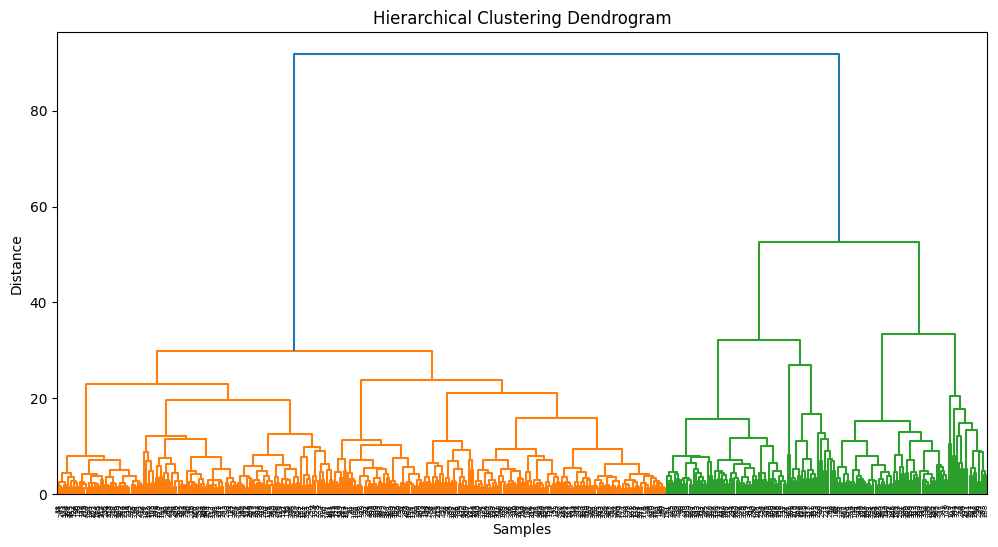

In [7]:
# Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_train, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

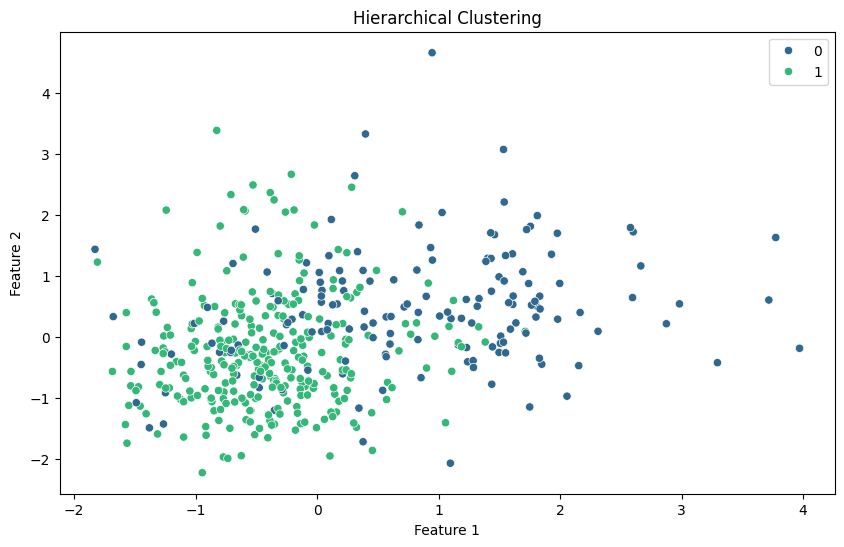

In [9]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [10]:
# Predict the clusters for the test set
test_cluster_labels = agglomerative_clustering.fit_predict(X_test)

In [11]:
# Calculate accuracy
# Since hierarchical clustering assigns arbitrary labels to clusters, we need to map cluster labels to target labels to calculate accuracy
# Here, we'll map the majority cluster label to the majority target label
majority_target_label_0 = np.argmax(np.bincount(y_train[cluster_labels == 0]))
majority_target_label_1 = np.argmax(np.bincount(y_train[cluster_labels == 1]))

In [12]:
mapped_cluster_labels = np.where(test_cluster_labels == 0, majority_target_label_0, majority_target_label_1)


In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, mapped_cluster_labels)
print("Accuracy:", accuracy)

Accuracy: 0.20175438596491227


In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette score
silhouette = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.337418094224194


In [15]:
# Davies–Bouldin index
davies_bouldin = davies_bouldin_score(X_train, cluster_labels)
print("Davies–Bouldin Index:", davies_bouldin)

Davies–Bouldin Index: 1.3754501964844383


In [16]:
# Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X_train, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

Calinski-Harabasz Index: 198.09485884992523
